In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NNDL/HW Extra

Mounted at /content/drive
/content/drive/MyDrive/NNDL/HW Extra


# load dataset

In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# preprocces

scale amount and drop time

In [3]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.005824,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.000105,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,0.014739,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.004807,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.002724,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


train test val

In [5]:
import numpy as np


X = df.drop('Class', axis=1)
y = df['Class']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Number transactions X_val dataset: ", X_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

Number transactions X_train dataset:  (182276, 29)
Number transactions y_train dataset:  (182276,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)
Number transactions X_val dataset:  (45569, 29)
Number transactions y_val dataset:  (45569,)


**SMOTE**

In [7]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [8]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy=0.5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 306
Before OverSampling, counts of label '0': 181970 

After OverSampling, the shape of train_X: (272955, 29)
After OverSampling, the shape of train_y: (272955,) 

After OverSampling, counts of label '1': 90985
After OverSampling, counts of label '0': 181970


one-hot encoding y

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 2)
y_train_res = to_categorical(y_train_res, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)
print(y_train[0 : 2, :])

[[1. 0.]
 [1. 0.]]


# Denoising autoencoder

making a noisy X_train!

In [ ]:
import numpy as np 

clean_signal = X_train_res
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [X_train_res.shape[0],X_train_res.shape[1]])  #gaussian noise
noise_signal = clean_signal + noise
print(noise_signal.shape)

noise_signal_train, noise_signal_val, clean_signal_train, clean_signal_val = train_test_split(noise_signal, clean_signal, test_size=0.2, random_state=0)

(272955, 29)


model denoising ae

In [ ]:
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard

In [ ]:
inp_layer = Input(shape = (29,))
hidden_layer1 = Dense(units = 22, activation = 'relu')(inp_layer)
hidden_layer2 = Dense(units = 15, activation = 'relu')(hidden_layer1)
hidden_layer3 = Dense(units = 10, activation = 'relu')(hidden_layer2)
hidden_layer4 = Dense(units = 15, activation = 'relu')(hidden_layer3)
hidden_layer5 = Dense(units = 22, activation = 'relu')(hidden_layer4)
out_layer = Dense(units = 29, activation = 'linear')(hidden_layer5)

Denoising_autoencoder = Model(inputs = inp_layer, outputs = out_layer)
Denoising_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 22)                352       
                                                                 
 dense_5 (Dense)             (None, 29)                667   

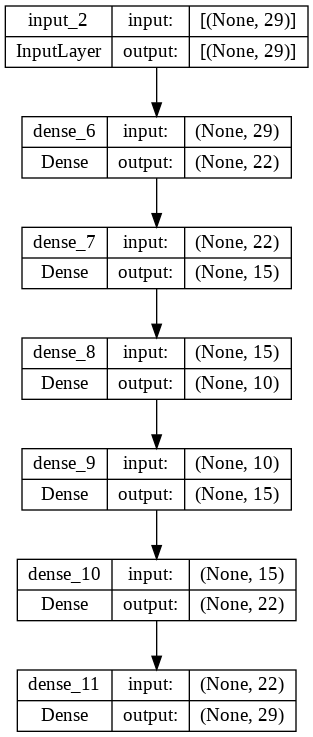

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(Denoising_autoencoder, show_shapes=True)

In [ ]:
import h5py
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_AutoEncoder.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

opt = Adam(learning_rate=0.001)
loss = mse
Denoising_autoencoder.compile(optimizer=opt, loss = loss, metrics = 'acc')

In [ ]:
results_Denoising = Denoising_autoencoder.fit(noise_signal_train, clean_signal_train,
                            batch_size=1024,
                            epochs=1000,
                            shuffle=True,
                            validation_data = (noise_signal_val, clean_signal_val),
                            callbacks=[es, mc])

Epoch 1/1000
211/214 [============================>.] - ETA: 0s - loss: 3.6607 - acc: 0.1724
Epoch 1: val_loss improved from inf to 1.42113, saving model to best_model_AutoEncoder.h5
214/214 [==============================] - 3s 9ms/step - loss: 3.6379 - acc: 0.1746 - val_loss: 1.4211 - val_acc: 0.3722
Epoch 2/1000
207/214 [============================>.] - ETA: 0s - loss: 0.8847 - acc: 0.4058
Epoch 2: val_loss improved from 1.42113 to 0.64039, saving model to best_model_AutoEncoder.h5
214/214 [==============================] - 1s 6ms/step - loss: 0.8778 - acc: 0.4072 - val_loss: 0.6404 - val_acc: 0.4503
Epoch 3/1000
214/214 [==============================] - ETA: 0s - loss: 0.5994 - acc: 0.4893
Epoch 3: val_loss improved from 0.64039 to 0.55680, saving model to best_model_AutoEncoder.h5
214/214 [==============================] - 1s 6ms/step - loss: 0.5994 - acc: 0.4893 - val_loss: 0.5568 - val_acc: 0.5238
Epoch 4/1000
205/214 [===========================>..] - ETA: 0s - loss: 0.5354 -

In [ ]:
#evaluating the model
Denoised = Denoising_autoencoder.predict(noise_signal_val[:10])

print(Denoised.shape)
print(Denoised - clean_signal_val[:10])

1/1 [==============================] - 0s 165ms/step
(10, 29)
        scaled_amount        V1        V2        V3        V4        V5  \
18456        0.001225 -0.009171 -0.077504 -0.044878 -0.070162 -0.035370   
62262        0.000359  0.045271  0.318427  0.042105  0.135709  0.132202   
150576      -0.000123  0.083578 -0.062772 -0.034202 -0.029849  0.003076   
152002      -0.000699 -0.071464 -0.124730  0.105225 -0.262551 -0.082694   
197934       0.001621 -0.201798 -0.152492 -0.301745 -0.123606  0.206779   
238493      -0.000541  0.233272 -0.041442  0.397366 -0.208580  0.170981   
123170       0.001318  0.175625  0.026160 -0.085856 -0.086044 -0.267816   
11910       -0.000431 -0.135725 -0.056358 -0.103302  0.027212  0.144614   
266164       0.001150  0.470891 -0.461665 -1.006749 -0.073835  0.432027   
64125        0.001219 -0.210002  0.105827  0.308770  0.017126  0.335073   

              V6        V7        V8        V9  ...       V19       V20  \
18456  -0.012876 -0.197472 -0.001496 

# Classifier

In [ ]:
from tensorflow.keras.models import load_model
Denoising_Autoencoder = load_model('best_model_AutoEncoder.h5')
Denoising_Autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 22)                352       
                                                                 
 dense_5 (Dense)             (None, 29)                667   

In [ ]:
# freeze all autoencoder layers
for layer in Denoising_Autoencoder.layers:
    layer.trainable = False

Denoising_Autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 22)                352       
                                                                 
 dense_5 (Dense)             (None, 29)                667   

In [ ]:
inp_layer = Input(shape = (29,))
denoised = Denoising_Autoencoder(inp_layer)
hidden_layer1 = Dense(units = 22, activation = 'relu')(denoised)
hidden_layer2 = Dense(units = 15, activation = 'relu')(hidden_layer1)
hidden_layer3 = Dense(units = 10, activation = 'relu')(hidden_layer2)
hidden_layer4 = Dense(units = 5, activation = 'relu')(hidden_layer3)
out_layer = Dense(units = 2, activation = 'softmax')(hidden_layer4)

Classifier = Model(inputs = inp_layer, outputs = out_layer)
Classifier.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 29)]              0         
                                                                 
 model (Functional)          (None, 29)                2349      
                                                                 
 dense_11 (Dense)            (None, 22)                660       
                                                                 
 dense_12 (Dense)            (None, 15)                345       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 2)                 12  

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

opt = Adam(learning_rate=0.001)
loss = binary_crossentropy
Classifier.compile(optimizer=opt, loss = loss, metrics = 'acc')

In [ ]:
import h5py
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_withSMOTE.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
print(y_train_res.shape)
print(X_train_res.shape)
print(y_val.shape)
print(X_val.shape)

(272955,)
(272955, 29)
(45569, 2)
(45569, 29)


In [ ]:
#y_train_res = to_categorical(y_train_res, num_classes = 2)

In [ ]:
results_Classifier = Classifier.fit(X_train_res, y_train_res,
                            batch_size=1024,
                            epochs=1000,
                            validation_data = (X_val, y_val),
                            shuffle=True,
                            callbacks=[es, mc])

Epoch 1/1000
260/267 [============================>.] - ETA: 0s - loss: 0.4260 - acc: 0.8383
Epoch 1: val_loss improved from inf to 0.05596, saving model to best_model_withSMOTE.h5
267/267 [==============================] - 2s 6ms/step - loss: 0.4195 - acc: 0.8413 - val_loss: 0.0560 - val_acc: 0.9856
Epoch 2/1000
256/267 [===========================>..] - ETA: 0s - loss: 0.0929 - acc: 0.9651
Epoch 2: val_loss improved from 0.05596 to 0.04201, saving model to best_model_withSMOTE.h5
267/267 [==============================] - 1s 5ms/step - loss: 0.0920 - acc: 0.9654 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 3/1000
266/267 [============================>.] - ETA: 0s - loss: 0.0553 - acc: 0.9787
Epoch 3: val_loss improved from 0.04201 to 0.03469, saving model to best_model_withSMOTE.h5
267/267 [==============================] - 1s 5ms/step - loss: 0.0553 - acc: 0.9787 - val_loss: 0.0347 - val_acc: 0.9878
Epoch 4/1000
258/267 [===========================>..] - ETA: 0s - loss: 0.0404 - acc: 

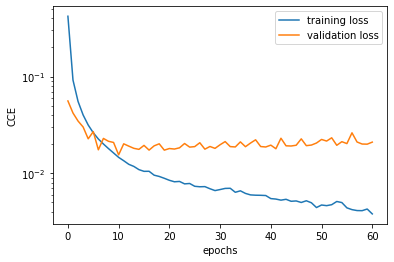

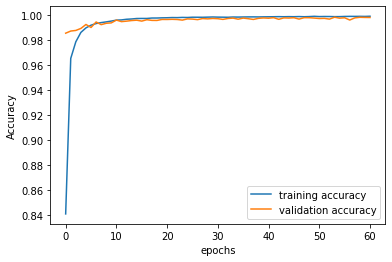

In [ ]:
import matplotlib.pyplot as plt

train_loss = results_Classifier.history['loss']
val_loss = results_Classifier.history['val_loss']

plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('CCE')
plt.show()

accuracy = results_Classifier.history['acc']
val_accuracy = results_Classifier.history['val_acc']

plt.plot(accuracy)
plt.plot(val_accuracy)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

# evaluation


In [11]:
from tensorflow.keras.models import load_model
Classifier = load_model('best_model_withSMOTE.h5')
Classifier.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 29)]              0         
                                                                 
 model (Functional)          (None, 29)                2349      
                                                                 
 dense_11 (Dense)            (None, 22)                660       
                                                                 
 dense_12 (Dense)            (None, 15)                345       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 2)                 12  

In [ ]:
y_hat = np.argmax(Classifier.predict(X_test),axis=1)
test_labels = np.argmax(y_test, axis=1)

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.31      0.87      0.45       101

    accuracy                           1.00     56962
   macro avg       0.65      0.93      0.73     56962
weighted avg       1.00      1.00      1.00     56962



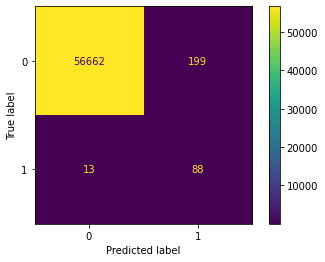

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_labels, y_hat)

In [12]:
y_hat = Classifier.predict(X_test)[:, 1]
test_labels = np.argmax(y_test, axis=1)

1781/1781 [==============================] - 2s 982us/step


In [13]:
from sklearn.metrics import confusion_matrix

x=500
AC=[]
REC=[]
TH=[]
for t in range(x):
    threshold = (t+1)/(x+1)
    #print(threshold)
    y_hat_int = (y_hat > threshold).astype(int)
    c_matrix = confusion_matrix(test_labels, y_hat_int)
    acc = (c_matrix[0,0]+c_matrix[1,1])/(sum(sum(c_matrix)))
    recall = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])
    #print(acc)
    #print(recall)
    AC.append(acc)
    REC.append(recall)
    TH.append(threshold)

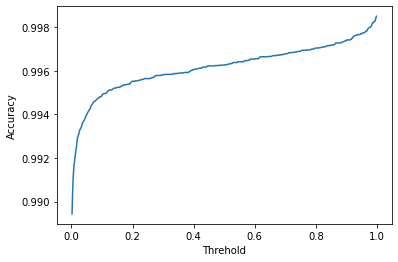

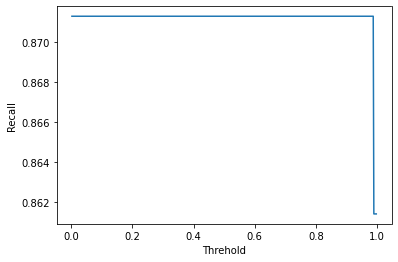

In [14]:
import matplotlib.pyplot as plt
plt.plot(TH,AC)
plt.xlabel('Threhold')
plt.ylabel('Accuracy')
plt.show()

plt.plot(TH,REC)
plt.xlabel('Threhold')
plt.ylabel('Recall')
plt.show()